# **After Job Offer, Choosing a Neighborhood in New York City**

## **Capstone Project (Week 2)**

## Table of Contents
1. [Introduction](#introduction)

2. [Data](#Data)

3. [Methodology](#Methodology)

4. [Results](#Results)

5. [Further Discussion](#Discussion)

6. [Conclusion](#Conclusion)

## 1. Introduction <a name="introduction"></a>

Moving to a different city comes with a number of challenges, and one of the biggest ones is to find the right place to live.  The choice of which neighborhood to live, within the new city, comes with a number of important questions. A few of the ones that come to mind are: 
* How much it will housing cost? 
* How much time the daily commute will take? 
* What kind of venues are near it? 

Regarding such questions, this project aims to answer them, at a general level, given two specific premises.  First, having found a new job in the financial district, located in lower Manhattan, and second, planning to live within one of the five New York City boroughs.
Based upon the assumptions given, this project compares average rent prices for different neighborhoods in Manhattan, Queens,  Brooklyn, the Bronx and Staten Island, the times that it takes to commute from them during rush hour, along with the most popular venues in them.

## 2. Data <a name="Data"></a>

To complete this project, it was necessary to gather data regarding rent, commuting times, and most popular venues for each of the neighborhoods in question.  While some of the data was readily available, the commuting times were collected individually from each neighborhood using google maps.  The specific data sources are listed below:

* Average rental data per neighborhood is available at:
https://streeteasy.com/blog/data-dashboard/

* The latitude and longitude for the neighborhoods across all five boroughs is available in different file formats, i.e. Derived Shapefile, KMZ and GeoJSON from:
https://geo.nyu.edu/catalog/nyu_2451_34572

* The commute times were collected from Google Maps:
https://www.google.com/maps/

* Lastly, the Foursquare API was used to find information about the venues location and their popularity among Foursquare users:
https://developer.foursquare.com/docs/api/venues/explore

In [1]:
import numpy as np
import pandas as pd
import requests
from urllib.request import urlopen
import json # library to handle JSON filesimport requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans # import k-means from clustering stage

df_ct = pd.read_csv("Commutting Times per Neighboorhood.csv")
df_rt = pd.read_csv("medianAskingRent_All.csv")

##changing column name for simplycity
df_ct.rename(columns={'NTA Name':'Neighborhood'}, inplace=True)

## Adding additional columns N1 .. N4 while expanding dataframe to fit all the Neighborhoods 
## having the same NTA code
df_ct[['N1','N2','N3','N4']] = df_ct.Neighborhood.str.split("-",expand=True)
## Dropping extra columns
df_ct = df_ct.drop(['Borough','NTA Code','Neighborhood'], axis =1)
## concatenating the N1 .. N4 columns and assingign the commuting time with accoringly
## and renaming 'Neighboorhood' the newly concatenated Column
df_ct = df_ct.melt(id_vars = ['Commute Time in Minutes'], value_name = 'Neighborhood')

In [2]:
## Eliminating 'None' entries from 'Neighboorhood' column in dataframe.
df_ct = df_ct.dropna()

## creating new dataframe df_rt_19 from 2 columns from df_rt
df_rt_19 = df_rt[['areaName','2019-04']]

## renaming columns to merge dataframe
df_rt_19.rename(columns={'areaName':'Neighborhood', '2019-04':'AvgRent'}, inplace=True)

## Opening local copy of .json file
with open('C:/Users/Grant/Documents/Data Science Class/newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

## define a variable that includes relevant data present in features section
neighborhoods_data = newyork_data['features']

## creating empty dataframe and naming columns for .json data
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

C:\Users\Grant\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [3]:
## loop through the data and fill the dataframe one row at a time.
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name'] 
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [4]:
## merging df_ct and neighborhoods dataframes by neighborhood name										  
df_ct= pd.merge(df_ct, neighborhoods, how='inner')


## merging df_ct and df_rt_19 dataframes by neighborhood name										  
df_ct= pd.merge(df_ct, df_rt_19, how='inner')

## dropping neighborhoods without rental data associated to them
df_ct = df_ct.dropna()

### Merged Dataframe Containing Neighborhood Name, Commute Time, Borough, Latitude, Longingtude and Average Rent Price

In [5]:
## sorting dataframe in ascending order to generate plot
df_ct = df_ct.sort_values('AvgRent')

## Checking types for the merged dataframe
df_ct.dtypes

# Changing AvgRent column contents from float to int 
df_ct['AvgRent'] = df_ct['AvgRent'].apply(np.int64)

## Dropping extra column and resetting index to work with loc python function on newly sorted dataframe
df_ct = df_ct.drop(['variable'], axis =1).reset_index(drop=True)

df_ct.head()

,Commute Time in Minutes,Neighborhood,Borough,Latitude,Longitude,AvgRent
0,54,Bedford Park,Bronx,40.870185,-73.885512,1550
1,58,Norwood,Bronx,40.877224,-73.879391,1598
2,80,Williamsbridge,Bronx,40.881039,-73.857446,1600
3,58,Morris Heights,Bronx,40.847898,-73.919672,1650
4,54,Woodlawn,Bronx,40.898273,-73.867315,1650


In [6]:
import seaborn as sns
from matplotlib import pyplot as plt

## findint out current plot size
fig_size = plt.rcParams["figure.figsize"]
print ("Current size:", fig_size)

Current size: [6.4, 4.8]


In [7]:
## Changing plot size to fit all neighborhoods; [0] X axis [1] Y axis
print ("Current size:", fig_size)
fig_size[0] = 12
fig_size[1] = 25
plt.rcParams["figure.figsize"] = fig_size

Current size: [6.4, 4.8]


## 3. Methodology <a name="Methodology"></a>
### 3.1 Data Cleaning
The choice of making the Wall Street financial district the target location for place to work, and therefore to commute to and from, was based on a report published by the New York City government which states that both lower and midtown Manhattan have the highest job density of the greater New York Metropolitan area, comprised by the 5 New York City boroughs, as well as northern New Jersey, Long Island, Southwest Connecticut, and the Hudson Valley.  The report is available here:

[The Geography of Jobs: NYC Metro Region Econnomic Snapshot (July 2018)]
<https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=9&cad=rja&uact=8&ved=2ahUKEwi295LHwZLkAhULsZ4KHQESBwIQFjAIegQIARAC&url=https://www1.nyc.gov/assets/planning/download/pdf/about/dcp-priorities/data-expertise/nyc-geography-jobs-0718.pdf&usg=AOvVaw3z8DN3u6trL_TVPZjJDR9L>

Also, according to a study performed by the Center for Urban Future in 2014, in spite that New Yorkers are likely to work on their home borough, Manhattan is still the city's employment center.
<https://nycfuture.org/data/fast-city-slow-commute>

Due to the wide popularity and accessibility of the subway, and that surface speeds have decreased over time, particulartly in Manhattan, this project uses the subway as the most consistent and reliable means of commuting. A link to the Mobility Report, from the NYC Department of Transportation discussing these findings can found here:
[Mobility ReportJune 2018 - NYC.gov]
<http://www.nyc.gov/html/dot/downloads/pdf/mobility-report-2018-print.pdf>

Regarding the commute times, they are several online tools which are able to show, on real-time, the time it takes to commute from different city areas, however their accuracy proved to be poor when compared to real-time data from google maps.  It is possible, the these tools were relying on information provided by all kinds of commuting means used in New York City, which include walking, driving or hiring a taxi cab or riding sharing service, biking, bus, subway and, in some cases, ferries. One of such tools can be found via the following link:
<https://www.mapnificent.net/newyork/#12/40.7290/-73.9980/900/40.7290/-73.9980/900/40.8117/-74.0211>

Since the commute information from each individual neighborhood, during rush hour, wasn't readily readily available, it was necessary to collect commuting times individually from Google Maps, so that a comprehensive time, as well as accurate, data table could be created.  The times were calculated based upon the following:

```python
Average Commute Time = (Time Morning Commute + Time Evening Commute) / 2
```


### 3.2 Feature Selection


Depending upon the individual user some features could be more important than others.  As expected, compromises may have to be made in order to find a suitable choice of housing. A shorter commute might mean a significantly higher rent, or fewer desirable venues near the chosen location. With that in mind, different classifications were made individually for each of the selected features.  The first of which dealt with rental cost at all the different neighborhoods.  As the graph below shows, the average rent prices has a rent price ranging from `$1,500.00` per month in Bedford Park Neighborhood park of the Bronx to `$7,400.00` per month in Manhattan's Central Park South.


C:\Users\Grant\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


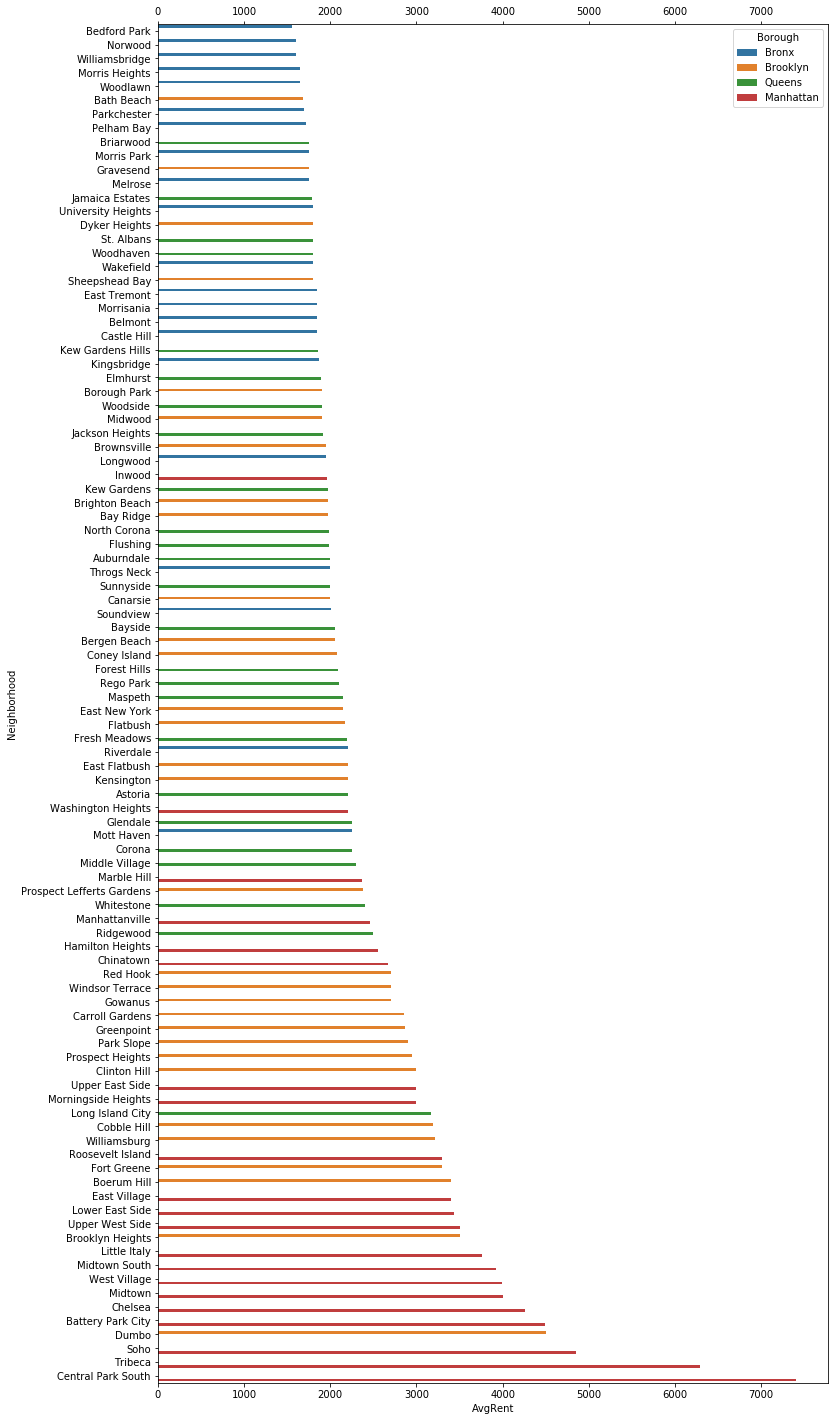

In [8]:
## Printing out barplot
fig, ax = plt.subplots()
sns.barplot(data=df_ct, x='AvgRent', y='Neighborhood', hue='Borough')
ax.tick_params(bottom=True, top=True) 
ax.tick_params(labelbottom=True, labeltop=True) 
plt.savefig('nyc_rent_prices.png', bbox_inches='tight') ## saving out to file
plt.show()


Also, it is worth noting that the biggest limiting factor for the whole data set was the number of neighborhoods for which average rental data was available.  Originally nearly two hundred neighborhoods, across all five boroughs, were considered, but only recent and reliable data, the latest being from April of 2019, was available for 103 of them, which are listed on the plot above. As shown, the data was incomplete for any neighborhoods in Long Island; some had rental data and venue data while some did not.  It was decided to exclude those neighborhoods altogether, so that a fair assessment could be made.


### 3.3 Selected Features Maps
To better display each neighborhood location, along with their corresponding average rental price, commute times and number of venues, the Python Folium library was used to generate three individual maps. The individual neighborhood locations are shown on the map by using the latitude and longitude information from the GEOjson file mentioned earlier in the Data section.  The difference between the overall data values gathered is displayed both by the color and size of the map markers, with larger circles denoting higher values.  To see the interactive version of the maps, please follow the links provided for each of them below their respective pictures. Clicking on the circles displays the individual neighborhood name, along with the numerical value related to that map related feature.

As the map below shows,  is clear that, with some exceptions, the neighborhoods closer to lower Manhattan's financial district command higher average rental prices, than other locations within New York City. 


In [9]:
from IPython.display import Image 
from IPython.core.display import HTML
import folium # plotting library
## Manhattan's Financial District as the center of the map  
address = 'Manhattan, NY'
latitude = 40.706
longitude = -74.009
print('The geograpical coordinates of Manhattan Financial District are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Manhattan Financial District are 40.706, -74.009.


In [19]:
## visualize the resulting rent prices by creating map
map_rents = folium.Map(location=[latitude, longitude], zoom_start=11.4)

colors_array = cm.rainbow(np.linspace(0, 1, 9))
rainbow = [colors.rgb2hex(i) for i in colors_array]

## add markers to the map for rent color coding
markers_colors = []
for lat, lng, poi, x in zip(df_ct['Latitude'], df_ct['Longitude'], df_ct['Neighborhood'], df_ct['AvgRent']):
	label = folium.Popup(str(poi) + ' AvgRent ' + str(x), parse_html=True)
	x = int(x/750)
	folium.CircleMarker(
        [lat, lng],
        radius=4+x,
        popup=label,
        color=rainbow[x-1],
        fill=True,
        fill_color=rainbow[x-1],
        fill_opacity=0.7).add_to(map_rents)

map_rents

In [20]:
map_rents.save("NYC_rents_map.html")

Next, the map below shows the commute times from the different neighborhoods to the financial district.  As it can be expected, with a few exceptions, the commute times are shorter from Manhattan neighborhoods than the ones from other boroughs.

In [21]:
## visualize the resulting commute times by creating map
map_commute = folium.Map(location=[latitude, longitude], zoom_start=11)

colors_array = cm.rainbow(np.linspace(0, 1, 9))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lng, poi, x in zip(df_ct['Latitude'], df_ct['Longitude'], df_ct['Neighborhood'], df_ct['Commute Time in Minutes']):
	label = folium.Popup(str(poi) + ', Commute Time in Minutes = ' + str(x), parse_html=True)
	x = int(x/12) 
	folium.CircleMarker(
        [lat, lng],
        radius=4+x,
        popup=label,
        color=rainbow[x-1],
        fill=True,
        fill_color=rainbow[x+1],
        fill_opacity=0.6
        ).add_to(map_commute)

map_commute

In [22]:
map_commute.save("NYC_commute.html")

Using the Foursquare location database Application Program Interface (API), it was possible to retrieve the information about the most popular places in each of the neighborhoods under consideration.  The New York City metropolitan area enjoys a great variety and number of popular venues; however, when it comes to individual neighborhoods, the data showed that there is a significant variation on the number of popular venues nearby.  As a result, it can be inferred that a larger number of popular venues indicates a more desirable neighborhood, since there a larger variety of things to do closer to a prospective rental choice.  For simplicity purposes, the number of venues per neighborhood was capped at a maximum of 100.  As the map shows, some of the neighborhoods have very few popular venues.

In [23]:
## using the Foursquare API to explore the neighborhoods and segment them.
CLIENT_ID = 'TB3YY4MVPFNCKR5H1PRZKHZ5ZLFLZKTVINED22U1HEEDWWVH' # your Foursquare ID
CLIENT_SECRET = 'ZBIY0KJXG3A3LXC4NJ03TTWNZ1C0UKAU03CMX3B5ZSODKGNL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

## sorting neighborhoods from highest rent to lowest
df_ct = df_ct.sort_values('AvgRent', ascending=False)

## resetting index to work with loc python function
df_ct = df_ct.reset_index()

df_ct.head()

Your credentails:
CLIENT_ID: TB3YY4MVPFNCKR5H1PRZKHZ5ZLFLZKTVINED22U1HEEDWWVH
CLIENT_SECRET:ZBIY0KJXG3A3LXC4NJ03TTWNZ1C0UKAU03CMX3B5ZSODKGNL


,index,Commute Time in Minutes,Neighborhood,Borough,Latitude,Longitude,AvgRent
0,100,21,Central Park South,Manhattan,40.765766,-73.977656,7400
1,99,12,Tribeca,Manhattan,40.721522,-74.010683,6295
2,98,12,Soho,Manhattan,40.722184,-74.000657,4850
3,97,19,Dumbo,Brooklyn,40.703176,-73.988753,4498
4,96,9,Battery Park City,Manhattan,40.711932,-74.016869,4493


In [24]:
##first neighborhood in list using the .loc python function
df_ct.loc[0, 'Neighborhood']
neighborhood_latitude = df_ct.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_ct.loc[0, 'Longitude'] # neighborhood longitude value
neighborhood_name = df_ct.loc[0, 'Neighborhood'] # neighborhood name
print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))


Latitude and longitude values of Central Park South are 40.76576579252983, -73.97765592211962.


In [25]:
## Creating the GET request URL. Name your URL url.
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
## Display URL
url
## Send the GET request and examine the resutls
results = requests.get(url).json()
results
## function that extracts the category of the venue															   
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']

    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

## clean the json and structure it into a pandas dataframe.
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues.head()

,name,categories,lat,lng
0,Carnegie Hall,Concert Hall,40.765125,-73.979918
1,Exhale Central Park South,Spa,40.766284,-73.977678
2,Central Park Bike Tours,Bike Rental / Bike Share,40.766368,-73.979851
3,Steinway Hall,Music Store,40.764503,-73.977830
4,Quality Meats,Steakhouse,40.765009,-73.976148


In [26]:
## function to repeat the same process to all the neighborhoods 
def getNearbyVenues(names, latitudes, longitudes, radius=500):

    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)

        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    return(nearby_venues)
     
## code to run the above function on each neighborhood and create a new dataframe called nyc_venues.
nyc_venues = getNearbyVenues(names=df_ct['Neighborhood'],
                                   latitudes=df_ct['Latitude'],
                                   longitudes=df_ct['Longitude']
                                  )

Central Park South
Tribeca
Soho
Dumbo
Battery Park City
Chelsea
Midtown
West Village
Midtown South
Little Italy
Brooklyn Heights
Upper West Side
Lower East Side
East Village
Boerum Hill
Fort Greene
Roosevelt Island
Williamsburg
Cobble Hill
Long Island City
Morningside Heights
Upper East Side
Clinton Hill
Prospect Heights
Park Slope
Greenpoint
Carroll Gardens
Gowanus
Windsor Terrace
Red Hook
Chinatown
Hamilton Heights
Ridgewood
Manhattanville
Whitestone
Prospect Lefferts Gardens
Marble Hill
Middle Village
Corona
Mott Haven
Glendale
Washington Heights
Astoria
Kensington
East Flatbush
Riverdale
Fresh Meadows
Flatbush
East New York
Maspeth
Maspeth
Rego Park
Forest Hills
Coney Island
Bergen Beach
Bayside
Soundview
Soundview
Throgs Neck
Canarsie
Sunnyside
Auburndale
Flushing
North Corona
Bay Ridge
Brighton Beach
Kew Gardens
Inwood
Longwood
Brownsville
Jackson Heights
Woodside
Borough Park
Midwood
Elmhurst
Elmhurst
Kingsbridge
Kew Gardens Hills
Castle Hill
Belmont
Morrisania
East Tremont
Dyke

In [27]:
## Checking resulting dataframe
print(nyc_venues.shape)
nyc_venues.head()

(4802, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central Park South,40.765766,-73.977656,Carnegie Hall,40.765125,-73.979918,Concert Hall
1,Central Park South,40.765766,-73.977656,Exhale Central Park South,40.766284,-73.977678,Spa
2,Central Park South,40.765766,-73.977656,Central Park Bike Tours,40.766368,-73.979851,Bike Rental / Bike Share
3,Central Park South,40.765766,-73.977656,Steinway Hall,40.764503,-73.977830,Music Store
4,Central Park South,40.765766,-73.977656,Quality Meats,40.765009,-73.976148,Steakhouse


In [31]:
## How many venues per neighborhood
nyc_venues.groupby('Neighborhood').count()
## how many unique categories
print('There are {} uniques categories.'.format(len(nyc_venues['Venue Category'].unique())))

There are 352 uniques categories.


In [34]:
## one hot encoding
nyc_onehot = pd.get_dummies(nyc_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
nyc_onehot['Neighborhood'] = nyc_venues['Neighborhood']
# move neighborhood column to the first column
fixed_columns = [nyc_onehot.columns[-1]] + list(nyc_onehot.columns[:-1])
nyc_onehot = nyc_onehot[fixed_columns]
nyc_onehot.head()
## looking at resulting dataframe
nyc_onehot.shape
## grouping neighborhoods by categories frequency of occurence
nyc_grouped = nyc_onehot.groupby('Neighborhood').mean().reset_index()
nyc_grouped
## checking new grouped size
nyc_grouped.shape
## each neighborhood with 5 most common kind of venues
num_top_venues = 5
for hood in nyc_grouped['Neighborhood']:
##    print("----"+hood+"----")
    temp = nyc_grouped[nyc_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
##    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
##    print('\n')

### Sorting the venues in each of the neigborhoods

In [37]:
 ## function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:num_top_venues]

## create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 7
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = nyc_grouped['Neighborhood']
for ind in np.arange(nyc_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nyc_grouped.iloc[ind, :], num_top_venues)
    
neighborhoods_venues_sorted.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,Astoria,Bar,Middle Eastern Restaurant,Hookah Bar,Greek Restaurant,Seafood Restaurant,Mediterranean Restaurant,Bakery
1,Auburndale,Ice Cream Shop,Athletics & Sports,Discount Store,Pharmacy,Pet Store,Noodle House,Fast Food Restaurant
2,Bath Beach,Pharmacy,Italian Restaurant,Fast Food Restaurant,Sushi Restaurant,Donut Shop,Kids Store,Bubble Tea Shop
3,Battery Park City,Park,Coffee Shop,Hotel,Gym,Memorial Site,Wine Shop,Italian Restaurant
4,Bay Ridge,Italian Restaurant,Spa,Pizza Place,Greek Restaurant,American Restaurant,Bar,Ice Cream Shop
5,Bayside,Bar,Pizza Place,Indian Restaurant,Sushi Restaurant,Pub,American Restaurant,Mexican Restaurant
6,Bedford Park,Diner,Mexican Restaurant,Deli / Bodega,Chinese Restaurant,Supermarket,Fried Chicken Joint,Bus Station
7,Belmont,Italian Restaurant,Pizza Place,Deli / Bodega,Bakery,Bank,Donut Shop,Dessert Shop
8,Bergen Beach,Harbor / Marina,Playground,Athletics & Sports,Donut Shop,Baseball Field,Food Court,French Restaurant
9,Boerum Hill,Dance Studio,Coffee Shop,Spa,Furniture / Home Store,Bar,French Restaurant,Sandwich Place


In [209]:
df_ct.head()

,Commute Time in Minutes,Neighborhood,Borough,Latitude,Longitude,AvgRent
0,54,Bedford Park,Bronx,40.870185,-73.885512,1550
1,58,Norwood,Bronx,40.877224,-73.879391,1598
2,80,Williamsbridge,Bronx,40.881039,-73.857446,1600
3,58,Morris Heights,Bronx,40.847898,-73.919672,1650
4,54,Woodlawn,Bronx,40.898273,-73.867315,1650


In [38]:
## sending dataframe as html table for publishing
neighborhoods_venues_sorted.to_html('neigborhood_venues_sorted.html')

##df_ct.to_html('df_info_ct.html')

In [50]:
## df_ct_sorted = df_ct_sorted.drop(['index','Latitude','Longitude'], axis =1)

In [39]:
## creating dataframe with number of venues per neighborhood
df_counted_venues = nyc_venues.groupby('Neighborhood').count().reset_index()
## dropping unnecessary columns
df_counted_venues = df_counted_venues.drop(['Neighborhood Latitude','Neighborhood Longitude','Venue','Venue Latitude','Venue Longitude'], axis =1)
## renaming column
df_counted_venues.rename(columns={'Venue Category':'Venue Count'}, inplace=True)
## merging with main df_ct dataframe
df_counted_venues = pd.merge(df_ct, df_counted_venues, how='inner')
df_counted_venues.head()

,index,Commute Time in Minutes,Neighborhood,Borough,Latitude,Longitude,AvgRent,Venue Count
0,100,21,Central Park South,Manhattan,40.765766,-73.977656,7400,100
1,99,12,Tribeca,Manhattan,40.721522,-74.010683,6295,100
2,98,12,Soho,Manhattan,40.722184,-74.000657,4850,100
3,97,19,Dumbo,Brooklyn,40.703176,-73.988753,4498,87
4,96,9,Battery Park City,Manhattan,40.711932,-74.016869,4493,100


In [41]:
## visualize the resulting commute times by creating map
map_venue_count = folium.Map(location=[latitude, longitude], zoom_start=11)

## colors_array = cm.rainbow(np.linspace(0, 1, 9))
## rainbow = [colors.rgb2hex(j) for j in colors_array]

markers_colors = []
for lat, lng, poi, x in zip(df_counted_venues['Latitude'], df_counted_venues['Longitude'], df_counted_venues['Neighborhood'], df_counted_venues['Venue Count']):
	label = folium.Popup(str(poi) + ', Venue Count = ' + str(x), parse_html=True)
	x = int(x/13) 
	folium.CircleMarker(
        [lat, lng],
        radius=4+x,
        popup=label,
        color=rainbow[x+1],
        fill=True,
        fill_color=rainbow[x],
        fill_opacity=0.5
        ).add_to(map_venue_count)
    
map_venue_count

In [42]:
map_venue_count.save("NYC_venue_count.html")

In [46]:
df_counted_venues = df_counted_venues[['Borough','Neighborhood','AvgRent','Commute Time in Minutes','Venue Count']]
df_counted_venues = df_counted_venues.sort_values('Commute Time in Minutes').reset_index(drop=True)
df_counted_venues.to_html('neighborhoods_table.html')

In [47]:
df_counted_venues = df_counted_venues[['Borough','Neighborhood','AvgRent','Commute Time in Minutes','Venue Count']]
##df_ct_sorted = df_ct_sorted[['Borough','Neighborhood','AvgRent','Commute Time in Minutes']]
df_counted_venues = df_counted_venues.sort_values('Borough').reset_index(drop=True)
df_counted_venues.head(5)

,Borough,Neighborhood,AvgRent,Commute Time in Minutes,Venue Count
0,Bronx,Castle Hill,1850,69,10
1,Bronx,Throgs Neck,2000,85,11
2,Bronx,Melrose,1750,48,26
3,Bronx,Morrisania,1850,48,24
4,Bronx,Soundview,2013,69,30


## 4. Results <a name="Results"></a>
The following table shows the averages for each of the features under consideration. It is easy to see from it, that Manhattan leads way on higher average rent prices, shorter commute times and largest number of venues per neighborhood, followed by Brooklyn, Queens and the Bronx.

In [53]:
## getting average for the dataframe and rounding reulst to 2 decimal places
df_counted_venues.groupby('Borough',).mean().round(2)

,AvgRent,Commute Time in Minutes,Venue Count
Borough,,,
Bronx,1829.59,61.73,27.82
Brooklyn,2506.65,34.84,49.29
Manhattan,3658.10,27.52,80.48
Queens,2086.22,56.89,42.59


In [214]:
##Creating individual dataframes to break down results per borough
df_bronx = df_counted_venues.iloc[0:22].reset_index(drop=True)
df_brooklyn = df_counted_venues.iloc[22:53] .reset_index(drop=True)
df_manhattan = df_counted_venues.iloc[53:74].reset_index(drop=True)
df_queens = df_counted_venues.iloc[74:].reset_index(drop=True)

To get a better picture for the results, it was decided to consider each borough individually. The first four tables shown below display the results sorted by commute time, from lowest to highest, while also including bar charts to make comparisons between neighborhoods easier. The fifth table shows the ovreall results.

#### Manhattan Results Table

In [233]:
df_manhattan = df_manhattan.sort_values('Commute Time in Minutes').reset_index(drop=True)
df_manhattan.style.bar(subset=['AvgRent','Commute Time in Minutes','Venue Count'], color=['peachpuff'])

,Borough,Neighborhood,AvgRent,Commute Time in Minutes,Venue Count
0,Manhattan,Battery Park City,4493,9,100
1,Manhattan,Tribeca,6295,12,100
2,Manhattan,Soho,4850,12,100
3,Manhattan,Little Italy,3763,12,100
4,Manhattan,Chinatown,2675,13,100
5,Manhattan,Lower East Side,3438,19,60
6,Manhattan,West Village,3995,19,100
7,Manhattan,Central Park South,7400,21,100
8,Manhattan,Midtown South,3923,21,100
9,Manhattan,Midtown,4000,21,100


#### Brooklyn Results Table

In [232]:
df_brooklyn = df_brooklyn.sort_values('Commute Time in Minutes').reset_index(drop=True)
df_brooklyn.style.bar(subset=['AvgRent','Commute Time in Minutes','Venue Count'], color=['palegreen'])

,Borough,Neighborhood,AvgRent,Commute Time in Minutes,Venue Count
0,Brooklyn,Brooklyn Heights,3500,11,100
1,Brooklyn,Cobble Hill,3195,11,100
2,Brooklyn,Boerum Hill,3395,19,88
3,Brooklyn,Dumbo,4498,19,87
4,Brooklyn,Clinton Hill,2995,23,92
5,Brooklyn,Williamsburg,3211,23,33
6,Brooklyn,Prospect Heights,2950,23,84
7,Brooklyn,Fort Greene,3300,24,79
8,Brooklyn,Gowanus,2704,26,70
9,Brooklyn,Park Slope,2900,26,72


#### Queen Results Table

In [224]:
df_queens = df_queens.sort_values('Commute Time in Minutes').reset_index(drop=True)
df_queens.style.bar(subset=['AvgRent','Commute Time in Minutes','Venue Count'], color=['lightblue'])

,Borough,Neighborhood,AvgRent,Commute Time in Minutes,Venue Count
0,Queens,Sunnyside,2000,32,44
1,Queens,Ridgewood,2500,39,40
2,Queens,Woodside,1900,39,78
3,Queens,Long Island City,3169,42,71
4,Queens,Astoria,2200,44,100
5,Queens,Forest Hills,2095,46,38
6,Queens,North Corona,1985,49,23
7,Queens,Maspeth,2150,50,64
8,Queens,Woodhaven,1800,50,21
9,Queens,Elmhurst,1890,50,80


#### Bronx Results Table

In [227]:
df_bronx = df_bronx.sort_values('Commute Time in Minutes').reset_index(drop=True)
df_bronx.style.bar(subset=['AvgRent','Commute Time in Minutes','Venue Count'], color=['moccasin'])

,Borough,Neighborhood,AvgRent,Commute Time in Minutes,Venue Count
0,Bronx,Melrose,1750,48,26
1,Bronx,Morrisania,1850,48,26
2,Bronx,Mott Haven,2250,50,23
3,Bronx,Longwood,1950,50,7
4,Bronx,Bedford Park,1550,54,39
5,Bronx,Woodlawn,1650,54,25
6,Bronx,Wakefield,1800,54,10
7,Bronx,Kingsbridge,1870,55,68
8,Bronx,Norwood,1598,58,32
9,Bronx,Morris Heights,1650,58,10


#### Overall Results Table

In [55]:
df_counted_venues = df_counted_venues.sort_values('Commute Time in Minutes').reset_index(drop=True)
df_counted_venues.style.bar(subset=['AvgRent','Commute Time in Minutes', 'Venue Count'], color=['silver'])

,Borough,Neighborhood,AvgRent,Commute Time in Minutes,Venue Count
0,Manhattan,Battery Park City,4493,9,100
1,Brooklyn,Brooklyn Heights,3500,11,100
2,Brooklyn,Cobble Hill,3195,11,100
3,Manhattan,Soho,4850,12,100
4,Manhattan,Tribeca,6295,12,100
5,Manhattan,Little Italy,3763,12,100
6,Manhattan,Chinatown,2675,13,100
7,Brooklyn,Boerum Hill,3395,19,90
8,Brooklyn,Dumbo,4498,19,87
9,Manhattan,West Village,3995,19,100


## 5. Further Discussion <a name="Discussion"></a>
Needless to say, the order of importance of any of the three selected features can vary from person to person, so the goal was to give an overall view of them for the selected neighborhoods. Also, those three features are but a few that might be considered when choosing the right neighborhood to live in.  Other possible factors that could significantly influence such choice could be: proximity to good schools, healthcare facilities, recreational opportunities, crime rates, having services within walking distance and proximity to airports among others.  It is always a possibility to expand upon this project to include some of those factors in the future.  Regardless, the availability of reliable data will always be a constraint to provide a truly comprehensive comparison.

As mentioned earlier, it was not possible to get accurate average rental data for a significant number of neighborhoods within the five boroughs, and for that reason the whole borough of Staten Island had to be excluded altogether. Something else to consider, is that the rental data presented is an average for any of the neighborhoods and individual rental prices can vary widely.

## 6. Conclusion <a name="Conclusion"></a>
Relocating to a new city is never an easy task, and it comes both challenges and opportunities.  Though having the ability to compare relevant information, regarding new prospective neighborhoods, does not eliminate the uncertainty regarding a new location; it can make the process just a bit easier.